# Chapter 11 - Time Series

In [111]:
import numpy as np
import pandas as pd

# 11.1 Date & Time Data Types & Tools

In [112]:
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2023, 2, 24, 13, 46, 17, 394923)

In [4]:
now.year, now.month, now.day

(2023, 2, 24)

In [7]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [113]:
from datetime import timedelta

In [11]:
start = datetime(2011, 1, 7)

In [12]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [14]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String & Datetime

In [15]:
stamp = datetime(2011, 1, 3)

In [16]:
str(stamp)

'2011-01-03 00:00:00'

In [17]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [18]:
value = "2011-01-03"

In [19]:
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
datestrs = ["7/6/2011", "9/6/2011"]

In [21]:
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 9, 6, 0, 0)]

In [22]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]

In [23]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [24]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [25]:
idx[2]

NaT

In [26]:
pd.isna(idx)

array([False, False,  True])

# 11.2 Time Series Basics

In [114]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [28]:
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02   -1.659091
2011-01-05   -1.726769
2011-01-07    0.287578
2011-01-08   -0.011891
2011-01-10    0.868585
2011-01-12   -0.469733
dtype: float64

In [29]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [30]:
ts + ts[::2]

2011-01-02   -3.318182
2011-01-05         NaN
2011-01-07    0.575157
2011-01-08         NaN
2011-01-10    1.737169
2011-01-12         NaN
dtype: float64

In [31]:
ts.index.dtype

dtype('<M8[ns]')

In [32]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [33]:
stamp = ts.index[2]

In [34]:
ts[stamp]

0.2875784405554326

In [35]:
ts["2011-01-10"]

0.8685846909092207

In [36]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                     index=pd.date_range("2000-01-01", periods=1000))

In [37]:
longer_ts

2000-01-01    0.478468
2000-01-02   -1.161904
2000-01-03    0.606397
2000-01-04   -1.266250
2000-01-05   -0.083483
                ...   
2002-09-22   -0.276255
2002-09-23    0.246360
2002-09-24    0.813209
2002-09-25    0.875997
2002-09-26   -0.526817
Freq: D, Length: 1000, dtype: float64

In [38]:
longer_ts["2001"]

2001-01-01    0.532430
2001-01-02   -1.016788
2001-01-03   -0.647931
2001-01-04    1.096543
2001-01-05   -0.027562
                ...   
2001-12-27    1.127880
2001-12-28   -0.570683
2001-12-29   -0.024675
2001-12-30    1.239320
2001-12-31   -0.554524
Freq: D, Length: 365, dtype: float64

In [39]:
longer_ts["2001-05"]

2001-05-01    0.182401
2001-05-02    0.388256
2001-05-03    2.043141
2001-05-04   -0.029181
2001-05-05   -0.198081
2001-05-06    0.090577
2001-05-07    1.485447
2001-05-08    1.486789
2001-05-09    0.423058
2001-05-10   -0.018831
2001-05-11    0.023397
2001-05-12    0.698532
2001-05-13   -0.007087
2001-05-14    0.590817
2001-05-15   -0.944324
2001-05-16   -0.671831
2001-05-17    0.564433
2001-05-18    1.327882
2001-05-19   -1.664435
2001-05-20    0.078614
2001-05-21    0.565468
2001-05-22   -0.656809
2001-05-23   -0.491105
2001-05-24    0.840438
2001-05-25   -1.464507
2001-05-26    0.951790
2001-05-27   -0.748790
2001-05-28    1.331029
2001-05-29    0.426476
2001-05-30    0.149062
2001-05-31   -0.644978
Freq: D, dtype: float64

In [40]:
ts[datetime(2001, 1, 7):]

2011-01-02   -1.659091
2011-01-05   -1.726769
2011-01-07    0.287578
2011-01-08   -0.011891
2011-01-10    0.868585
2011-01-12   -0.469733
dtype: float64

In [41]:
ts

2011-01-02   -1.659091
2011-01-05   -1.726769
2011-01-07    0.287578
2011-01-08   -0.011891
2011-01-10    0.868585
2011-01-12   -0.469733
dtype: float64

In [42]:
ts["2001-01-06":"2011-01-11"]

2011-01-02   -1.659091
2011-01-05   -1.726769
2011-01-07    0.287578
2011-01-08   -0.011891
2011-01-10    0.868585
dtype: float64

In [44]:
ts.truncate(after="2011-01-09")

2011-01-02   -1.659091
2011-01-05   -1.726769
2011-01-07    0.287578
2011-01-08   -0.011891
dtype: float64

In [45]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")

In [49]:
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                               "New York", "Ohio"])

In [50]:
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,0.907380,1.713466,-0.680488,-0.367441
2001-05-09,-1.375638,-0.150518,0.436969,-0.312001
2001-05-16,-0.085973,-0.659620,-0.036402,-0.639080
2001-05-23,0.378313,-0.791655,0.663810,-0.557665
2001-05-30,-0.359281,0.490319,1.205693,-0.847454


### Time Series with Duplicate Indices

In [115]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"])

In [52]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [53]:
dup_ts.index.is_unique

False

In [54]:
dup_ts["2000-01-03"]

4

In [55]:
dup_ts["2000-01-02"]

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [56]:
grouped = dup_ts.groupby(level=0)

In [58]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [59]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 Data Ranges, Frequencies & Shifting

In [60]:
ts

2011-01-02   -1.659091
2011-01-05   -1.726769
2011-01-07    0.287578
2011-01-08   -0.011891
2011-01-10    0.868585
2011-01-12   -0.469733
dtype: float64

In [61]:
resampler = ts.resample("D")
resampler

### Generating Dates Ranges

In [62]:
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [63]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [65]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [66]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [67]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [68]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [116]:
from pandas.tseries.offsets import Hour, Minute

In [59]:
hour = Hour()

In [60]:
hour

<Hour>

In [61]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [62]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [63]:
Hour(2) + Minute(30)

<150 * Minutes>

In [77]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

##### Week of months dates

In [78]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")

In [79]:
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading & Lagging) Data

In [5]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2000-01-01", periods=4, freq="M"))

In [6]:
ts

2000-01-31    0.403655
2000-02-29   -0.031094
2000-03-31    0.333636
2000-04-30   -0.632779
Freq: M, dtype: float64

In [7]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.403655
2000-04-30   -0.031094
Freq: M, dtype: float64

In [8]:
ts.shift(-2)

2000-01-31    0.333636
2000-02-29   -0.632779
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [9]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29    -1.077031
2000-03-31   -11.729919
2000-04-30    -2.896615
Freq: M, dtype: float64

In [10]:
ts.shift(2, freq="M")

2000-03-31    0.403655
2000-04-30   -0.031094
2000-05-31    0.333636
2000-06-30   -0.632779
Freq: M, dtype: float64

In [11]:
ts.shift(3, freq="D")

2000-02-03    0.403655
2000-03-03   -0.031094
2000-04-03    0.333636
2000-05-03   -0.632779
dtype: float64

In [12]:
ts.shift(1, freq="90T")

2000-01-31 01:30:00    0.403655
2000-02-29 01:30:00   -0.031094
2000-03-31 01:30:00    0.333636
2000-04-30 01:30:00   -0.632779
dtype: float64

##### Shifting dates with offsets

In [117]:
from pandas.tseries.offsets import Day, MonthEnd

In [14]:
now = datetime(2011, 11, 17)

In [15]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [16]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [17]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [18]:
offset = MonthEnd()

In [19]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [20]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [21]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D")
              )

In [22]:
ts

2000-01-15    0.453967
2000-01-19    0.666525
2000-01-23    1.147448
2000-01-27   -0.725488
2000-01-31    0.412318
2000-02-04    0.925686
2000-02-08    2.493977
2000-02-12   -0.326343
2000-02-16    1.061141
2000-02-20    1.211819
2000-02-24   -0.351197
2000-02-28    0.333702
2000-03-03   -1.100973
2000-03-07    0.484867
2000-03-11    0.430596
2000-03-15   -1.094137
2000-03-19   -0.647271
2000-03-23   -0.993651
2000-03-27    0.513373
2000-03-31   -1.807783
Freq: 4D, dtype: float64

In [23]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31    0.390954
2000-02-29    0.764112
2000-03-31   -0.526872
dtype: float64

In [24]:
ts.resample("M").mean()

2000-01-31    0.390954
2000-02-29    0.764112
2000-03-31   -0.526872
Freq: M, dtype: float64

# 11.4 Time Zone Handling

In [118]:
import pytz

In [26]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [27]:
tz = pytz.timezone("America/New_York")

In [28]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization & Conversion

In [30]:
dates = pd.date_range("2012-03-09 09:30", periods=6)

In [31]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [32]:
ts

2012-03-09 09:30:00   -0.613357
2012-03-10 09:30:00   -0.091298
2012-03-11 09:30:00    0.075418
2012-03-12 09:30:00    0.319718
2012-03-13 09:30:00   -2.034480
2012-03-14 09:30:00   -0.615879
Freq: D, dtype: float64

In [111]:
print(ts.index.tz)

None


In [33]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [34]:
ts

2012-03-09 09:30:00   -0.613357
2012-03-10 09:30:00   -0.091298
2012-03-11 09:30:00    0.075418
2012-03-12 09:30:00    0.319718
2012-03-13 09:30:00   -2.034480
2012-03-14 09:30:00   -0.615879
Freq: D, dtype: float64

In [36]:
ts_utc = ts.tz_localize("UTC")

In [37]:
ts_utc

2012-03-09 09:30:00+00:00   -0.613357
2012-03-10 09:30:00+00:00   -0.091298
2012-03-11 09:30:00+00:00    0.075418
2012-03-12 09:30:00+00:00    0.319718
2012-03-13 09:30:00+00:00   -2.034480
2012-03-14 09:30:00+00:00   -0.615879
Freq: D, dtype: float64

In [38]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [39]:
ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00   -0.613357
2012-03-10 04:30:00-05:00   -0.091298
2012-03-11 05:30:00-04:00    0.075418
2012-03-12 05:30:00-04:00    0.319718
2012-03-13 05:30:00-04:00   -2.034480
2012-03-14 05:30:00-04:00   -0.615879
Freq: D, dtype: float64

In [42]:
ts_eastern = ts.tz_localize("America/New_York")

In [43]:
ts_eastern.tz_convert("UTC")

2012-03-09 14:30:00+00:00   -0.613357
2012-03-10 14:30:00+00:00   -0.091298
2012-03-11 13:30:00+00:00    0.075418
2012-03-12 13:30:00+00:00    0.319718
2012-03-13 13:30:00+00:00   -2.034480
2012-03-14 13:30:00+00:00   -0.615879
dtype: float64

In [44]:
ts_eastern.tz_convert("Europe/Berlin")

2012-03-09 15:30:00+01:00   -0.613357
2012-03-10 15:30:00+01:00   -0.091298
2012-03-11 14:30:00+01:00    0.075418
2012-03-12 14:30:00+01:00    0.319718
2012-03-13 14:30:00+01:00   -2.034480
2012-03-14 14:30:00+01:00   -0.615879
dtype: float64

In [45]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone-Aware Timestamp Objects

In [46]:
stamp = pd.Timestamp("2011-03-12 04:00")

In [47]:
stamp_utc = stamp.tz_localize("utc")

In [48]:
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [49]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")

In [50]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [51]:
stamp_utc.value

1299902400000000000

In [52]:
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

In [55]:
stamp = pd.Timestamp("2012-03-11 01:30", tz = "US/Eastern")

In [56]:
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [64]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [65]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/eastern")

In [66]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [67]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [68]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")

In [69]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [70]:
ts

2012-03-07 09:30:00    2.193721
2012-03-08 09:30:00   -0.280389
2012-03-09 09:30:00    0.727141
2012-03-12 09:30:00   -1.123972
2012-03-13 09:30:00   -0.200528
2012-03-14 09:30:00    0.412362
2012-03-15 09:30:00   -0.237362
2012-03-16 09:30:00   -0.151283
2012-03-19 09:30:00    0.798387
2012-03-20 09:30:00    1.708852
Freq: B, dtype: float64

In [71]:
ts1 = ts[:7].tz_localize("Europe/London")

In [72]:
ts2 = ts1[2:].tz_convert("Europe/Moscow")

In [73]:
result = ts1 + ts2

In [74]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# 11.5 Periods & Period Arithmetic

In [75]:
p = pd.Period("2011", freq="A-DEC")

In [76]:
p

Period('2011', 'A-DEC')

In [77]:
p + 5

Period('2016', 'A-DEC')

In [78]:
p - 2

Period('2009', 'A-DEC')

In [80]:
pd.Period("2014", freq="A-DEC") - p

<3 * YearEnds: month=12>

In [81]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [82]:
pd.Series(np.random.standard_normal(6), index=periods)

2000-01   -1.223403
2000-02   -0.642267
2000-03    0.475623
2000-04    3.239596
2000-05    1.646053
2000-06    0.247582
Freq: M, dtype: float64

In [83]:
values = ["2001Q3", "2002Q2", "2003Q1"]

In [84]:
index = pd.PeriodIndex(values, freq="Q-DEC")

In [86]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period Frequency Conversion

In [87]:
p = pd.Period("2011", freq="A-DEC")
p

Period('2011', 'A-DEC')

In [88]:
p.asfreq("M", how="start")

Period('2011-01', 'M')

In [89]:
p.asfreq("M", how="end")

Period('2011-12', 'M')

In [90]:
p.asfreq("M")

Period('2011-12', 'M')

In [91]:
p = pd.Period("2011", freq="A-JUN")
p

Period('2011', 'A-JUN')

In [92]:
p.asfreq("M", how="start")

Period('2010-07', 'M')

In [93]:
p.asfreq("M", how="end")

Period('2011-06', 'M')

In [94]:
p = pd.Period("Aug-2011", "M")

In [95]:
p.asfreq("A-JUN")

Period('2012', 'A-JUN')

In [96]:
periods = pd.period_range("2006", "2009", freq="A-DEC")

In [97]:
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts

2006   -0.626975
2007    0.030314
2008    0.703650
2009    1.073192
Freq: A-DEC, dtype: float64

In [98]:
ts.asfreq("M", how="start")

2006-01   -0.626975
2007-01    0.030314
2008-01    0.703650
2009-01    1.073192
Freq: M, dtype: float64

In [99]:
ts.asfreq("B", how="start")

2006-01-02   -0.626975
2007-01-01    0.030314
2008-01-01    0.703650
2009-01-01    1.073192
Freq: B, dtype: float64

In [100]:
ts.asfreq("B", how="end")

2006-12-29   -0.626975
2007-12-31    0.030314
2008-12-31    0.703650
2009-12-31    1.073192
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [101]:
p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [102]:
p.asfreq("D", how="start")

Period('2011-11-01', 'D')

In [103]:
p.asfreq("D", how="end")

Period('2012-01-31', 'D')

In [104]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 + 6
p4pm

Period('2012-01-30 00:22', 'T')

In [105]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")

In [107]:
ts = pd.Series(np.arange(len(periods)), index=periods)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [108]:
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 1

In [109]:
ts.index = new_periods.to_timestamp()
ts

2010-10-28 01:00:00    0
2011-01-28 01:00:00    1
2011-04-28 01:00:00    2
2011-07-28 01:00:00    3
2011-10-28 01:00:00    4
2012-01-30 01:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back) 

In [120]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")

In [121]:
ts = pd.Series(np.random.standard_normal(3), index=dates)

In [122]:
ts

2000-01-31   -0.495767
2000-02-29   -0.366814
2000-03-31   -0.755959
Freq: M, dtype: float64

In [124]:
pts = ts.to_period()
pts

2000-01   -0.495767
2000-02   -0.366814
2000-03   -0.755959
Freq: M, dtype: float64

In [125]:
dates = pd.date_range("2000-01-29", periods=6)

In [126]:
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2

2000-01-29   -1.017474
2000-01-30    0.435346
2000-01-31   -0.317483
2000-02-01   -0.217070
2000-02-02    0.052484
2000-02-03   -1.580668
Freq: D, dtype: float64

In [127]:
ts2.to_period("M")

2000-01   -1.017474
2000-01    0.435346
2000-01   -0.317483
2000-02   -0.217070
2000-02    0.052484
2000-02   -1.580668
Freq: M, dtype: float64

In [128]:
pts = ts2.to_period()

In [129]:
pts

2000-01-29   -1.017474
2000-01-30    0.435346
2000-01-31   -0.317483
2000-02-01   -0.217070
2000-02-02    0.052484
2000-02-03   -1.580668
Freq: D, dtype: float64

In [130]:
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999   -1.017474
2000-01-30 23:59:59.999999999    0.435346
2000-01-31 23:59:59.999999999   -0.317483
2000-02-01 23:59:59.999999999   -0.217070
2000-02-02 23:59:59.999999999    0.052484
2000-02-03 23:59:59.999999999   -1.580668
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [133]:
data = pd.read_csv("examples/macrodata.csv")

In [134]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [135]:
data["year"]

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [136]:
data["quarter"]

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [137]:
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"], freq="Q-DEC")
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [138]:
data.index = index

In [139]:
data["infl"]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 11.6 Resampling & Frequency Conversion

In [140]:
dates = pd.date_range("2000-01-01", periods=100)

In [141]:
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-01    2.457679
2000-01-02    0.967811
2000-01-03   -0.964082
2000-01-04   -1.241293
2000-01-05    0.112447
                ...   
2000-04-05    0.086681
2000-04-06    0.295784
2000-04-07   -0.708963
2000-04-08   -0.032646
2000-04-09   -0.434504
Freq: D, Length: 100, dtype: float64

In [142]:
ts.resample("M").mean()

2000-01-31    0.058525
2000-02-29   -0.187544
2000-03-31    0.219062
2000-04-30   -0.056185
Freq: M, dtype: float64

In [143]:
ts.resample("M", kind="period").mean()

2000-01    0.058525
2000-02   -0.187544
2000-03    0.219062
2000-04   -0.056185
Freq: M, dtype: float64

### Downsampling

In [144]:
dates = pd.date_range("2000-01-01", periods=12, freq="T")

In [146]:
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [147]:
ts.resample("5min").sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [148]:
ts.resample("5min", closed="right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [149]:
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [150]:
from pandas.tseries.frequencies import to_offset

In [152]:
result = ts.resample("5min", closed="right", label="right").sum()

In [153]:
result.index = result.index + to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

##### Open-high-low-close (OHLC) resampling

In [154]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)

In [155]:
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,9,11,6,10
2000-01-01 00:05:00,5,7,0,2
2000-01-01 00:10:00,1,4,1,4


### Upsampling & Interpolation

In [156]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                    index=pd.date_range("2000-01-01", periods=2,
                                       freq="W-WED"),
                    columns=["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.401341,-0.379005,1.459316,0.400609
2000-01-12,1.354700,-0.669538,-0.311482,-0.170310


In [157]:
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.401341,-0.379005,1.459316,0.400609
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.354700,-0.669538,-0.311482,-0.170310


In [159]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.401341,-0.379005,1.459316,0.400609
2000-01-06,-0.401341,-0.379005,1.459316,0.400609
2000-01-07,-0.401341,-0.379005,1.459316,0.400609
2000-01-08,-0.401341,-0.379005,1.459316,0.400609
2000-01-09,-0.401341,-0.379005,1.459316,0.400609
2000-01-10,-0.401341,-0.379005,1.459316,0.400609
2000-01-11,-0.401341,-0.379005,1.459316,0.400609
2000-01-12,1.354700,-0.669538,-0.311482,-0.170310


In [160]:
frame.resample("D").ffill(2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.401341,-0.379005,1.459316,0.400609
2000-01-06,-0.401341,-0.379005,1.459316,0.400609
2000-01-07,-0.401341,-0.379005,1.459316,0.400609
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.354700,-0.669538,-0.311482,-0.170310


In [162]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.401341,-0.379005,1.459316,0.400609
2000-01-13,1.354700,-0.669538,-0.311482,-0.170310


### Resampling with Periods

In [164]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                    index=pd.period_range("1-2000", "12-2001",
                                         freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])

In [165]:
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,0.785904,-0.370091,1.589952,-1.771775
2000-02,0.117108,1.249742,1.562703,0.135855
2000-03,-0.065846,2.013892,0.423024,-1.842830
2000-04,-0.236598,0.577883,-0.766802,-0.278941
2000-05,-0.655277,0.176114,0.293742,-0.093306


In [166]:
annual_frame = frame.resample("A-DEC").mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.227343,0.186848,0.353175,-0.646346
2001,-0.054113,0.723884,0.291866,-0.221942


In [167]:
annual_frame.resample("Q-DEC").ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.227343,0.186848,0.353175,-0.646346
2000Q2,-0.227343,0.186848,0.353175,-0.646346
2000Q3,-0.227343,0.186848,0.353175,-0.646346
2000Q4,-0.227343,0.186848,0.353175,-0.646346
2001Q1,-0.054113,0.723884,0.291866,-0.221942
2001Q2,-0.054113,0.723884,0.291866,-0.221942
2001Q3,-0.054113,0.723884,0.291866,-0.221942
2001Q4,-0.054113,0.723884,0.291866,-0.221942


In [168]:
annual_frame.resample("Q-DEC", convention="end").asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,-0.227343,0.186848,0.353175,-0.646346
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.054113,0.723884,0.291866,-0.221942


In [170]:
annual_frame.resample("Q-MAR").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.227343,0.186848,0.353175,-0.646346
2001Q1,-0.227343,0.186848,0.353175,-0.646346
2001Q2,-0.227343,0.186848,0.353175,-0.646346
2001Q3,-0.227343,0.186848,0.353175,-0.646346
2001Q4,-0.054113,0.723884,0.291866,-0.221942
2002Q1,-0.054113,0.723884,0.291866,-0.221942
2002Q2,-0.054113,0.723884,0.291866,-0.221942
2002Q3,-0.054113,0.723884,0.291866,-0.221942


### Grouped Time Resampling

In [171]:
N = 15

In [172]:
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)

In [173]:
df = pd.DataFrame({"time": times,
                  "value": np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [174]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [175]:
df2 = pd.DataFrame({"time": times.repeat(3),
                   "key": np.tile(["a", "b", "c"], N),
                   "value": np.arange(N * 3.)})

In [176]:
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [177]:
time_key = pd.Grouper(freq="5min")

In [178]:
resampled = (df2.set_index("time")
            .groupby(["key", time_key])
            .sum())
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [180]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


# 11.7 Moving Window Functions

In [189]:
import matplotlib.pyplot as plt

In [181]:
close_px_all = pd.read_csv("examples/stock_px.csv",
                          parse_dates=True, index_col=0)

In [182]:
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]

In [183]:
close_px = close_px.resample("B").ffill()

<AxesSubplot: >

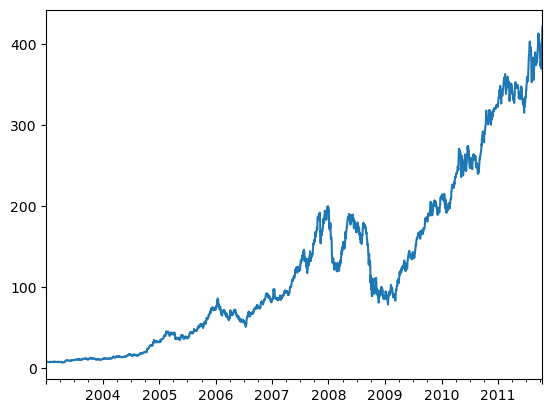

In [184]:
close_px["AAPL"].plot()

<AxesSubplot: >

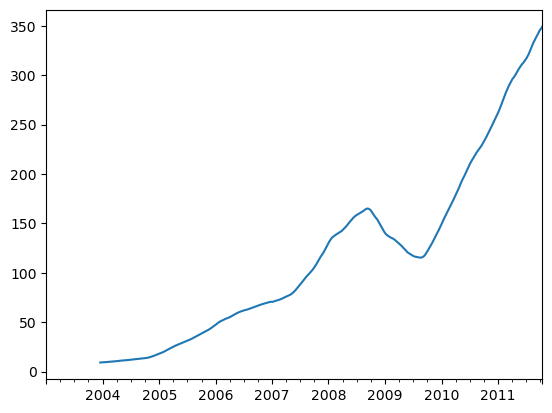

In [186]:
close_px["AAPL"].rolling(250).mean().plot()

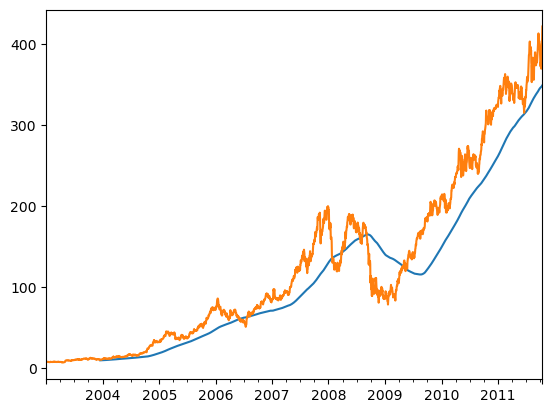

In [190]:
close_px = close_px.resample("B").ffill()
close_px["AAPL"].rolling(250).mean().plot()
close_px["AAPL"].plot()
plt.show()

In [192]:
plt.figure()
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()

<Figure size 640x480 with 0 Axes>

In [193]:
std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot: >

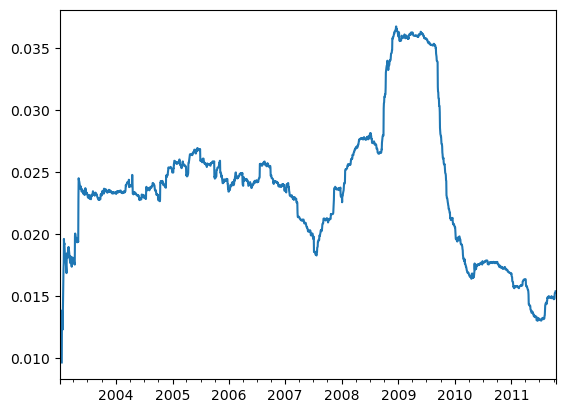

In [194]:
std250.plot()

In [195]:
expanding_mean = std250.expanding().mean()

In [196]:
plt.style.use('grayscale')

<AxesSubplot: >

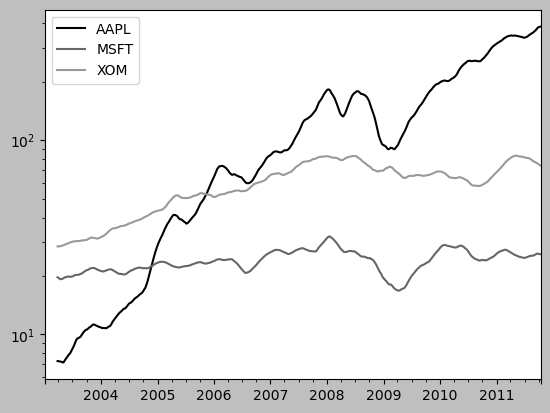

In [197]:
close_px.rolling(60).mean().plot(logy=True)

In [198]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [201]:
aapl_px = close_px["AAPL"]["2006":"2007"]

In [219]:
ma30 = aapl_px.rolling(30, min_periods=20).mean()

In [220]:
ewma30 = aapl_px.ewm(span=30).mean()

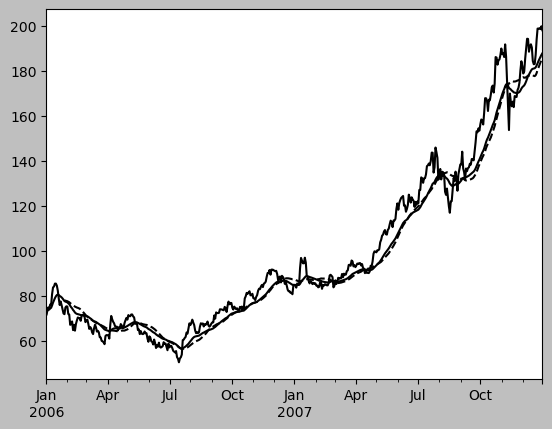

In [221]:
aapl_px.plot(style="k", label="Price")
ma30.plot(style="k--", label="Simple Moving Avg")
ewma30.plot(style="k-", label="EW MA")
plt.show()

### Binary moving Window Functions

In [212]:
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [213]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)

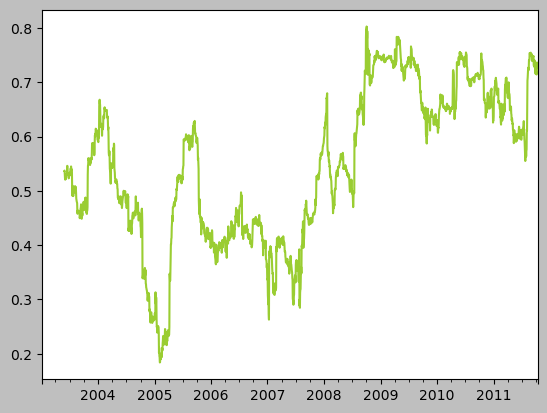

In [222]:
corr.plot(color='yellowgreen')
plt.show()

In [223]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

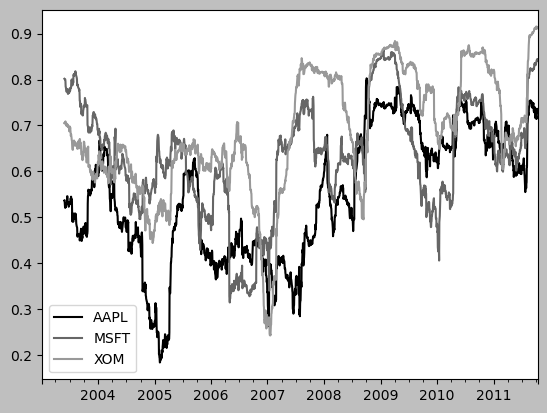

In [229]:
corr.plot()
plt.show()

### User-Defined moving Window Functions

In [230]:
from scipy.stats import percentileofscore

In [231]:
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

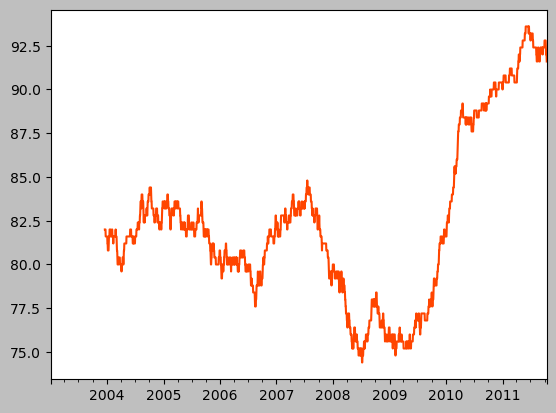

In [235]:
result = returns["AAPL"].rolling(250).apply(score_at_2percent)
result.plot(color='orangered')
plt.show()